In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 이동평균선

In [3]:
import FinanceDataReader as fdr

In [4]:
df = fdr.DataReader('005930', '2020', '2022')

In [14]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509
2021-12-27,80600,80600,79800,80200,10783368,-0.003727
2021-12-28,80200,80400,79700,80300,18226325,0.001247


In [16]:
# 수익률

df['Close'].pct_change(periods=1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [21]:
# 원금대비수익률

df['return'] = df['Change'] + 1
df['return']

Date
2020-01-02    0.989247
2020-01-03    1.005435
2020-01-06    1.000000
2020-01-07    1.005405
2020-01-08    1.017921
                ...   
2021-12-24    1.007509
2021-12-27    0.996273
2021-12-28    1.001247
2021-12-29    0.981320
2021-12-30    0.993655
Name: return, Length: 496, dtype: float64

In [28]:
# 누적 수익률

df['return'].cumprod()

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

In [29]:
# 이동평균선

In [30]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [35]:
df['20ma'] = df['Close'].rolling(20).mean()
df['60ma'] = df['Close'].rolling(60).mean()
df['5ma'] = df['Close'].rolling(5).mean()

In [36]:
df

,Open,High,Low,Close,Volume,Change,return,20ma,60ma,5ma
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,NaN,NaN,55760.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,1.007509,76890.0,73046.666667,79000.0
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,0.996273,77285.0,73148.333333,79620.0
2021-12-28,80200,80400,79700,80300,18226325,0.001247,1.001247,77735.0,73266.666667,80060.0


<AxesSubplot:xlabel='Date'>

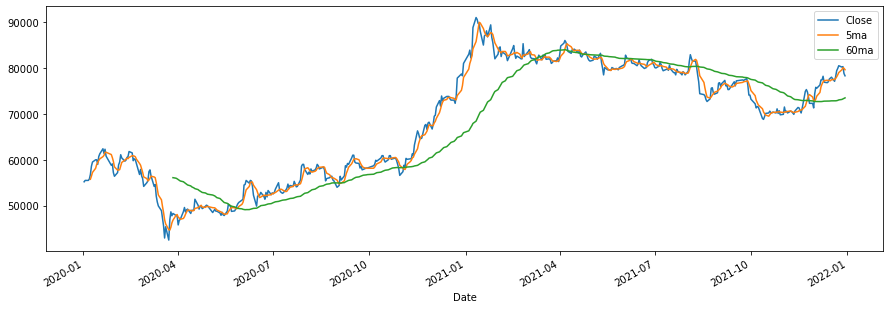

In [37]:
df[['Close', '5ma', '60ma']].plot(figsize=(15,5))

In [45]:
# 2일별 종가

df['Close'].asfreq('2D')

Date
2020-01-02    55200.0
2020-01-04        NaN
2020-01-06    55500.0
2020-01-08    56800.0
2020-01-10    59500.0
               ...   
2021-12-22    79400.0
2021-12-24    80500.0
2021-12-26        NaN
2021-12-28    80300.0
2021-12-30    78300.0
Freq: 2D, Name: Close, Length: 365, dtype: float64

In [42]:
# 월별 평균 종가

df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [43]:
# 분기별 평균 종가

df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [44]:
# 주별 평균 종가

df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64